In [9]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"

from pathlib import Path
import scanpy as sc
import squidpy as sq
import numpy as np

sc.settings.verbosity = 2
sc.settings.set_figure_params(dpi=120, facecolor="white")

INP = Path("../data/processed/visium_breast_cancer_blockA_section1_qc.h5ad")
adata = sc.read_h5ad(INP)
adata



import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="dask.dataframe")
warnings.filterwarnings("ignore", category=UserWarning, module="xarray_schema")
warnings.filterwarnings("ignore", category=FutureWarning, module="anndata.utils")

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)




print(adata)
print("n_obs:", adata.n_obs, "n_vars:", adata.n_vars)
print("has spatial coords:", "spatial" in adata.obsm)
print("has images:", "spatial" in adata.uns)
print("obs cols:", adata.obs.columns[:10].tolist())




AnnData object with n_obs × n_vars = 3793 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'pass_qc'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'pass_qc_colors', 'spatial'
    obsm: 'spatial'
n_obs: 3793 n_vars: 36601
has spatial coords: True
has images: True
obs cols: ['in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'pass_qc']


In [10]:
adata.layers["counts"] = adata.X.copy()


In [6]:
#Normalization

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

adata.raw = adata  


normalizing counts per cell
    finished (0:00:05)


In [11]:
#HVG Selection

sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=3000,
    layer="counts"
)



extracting highly variable genes


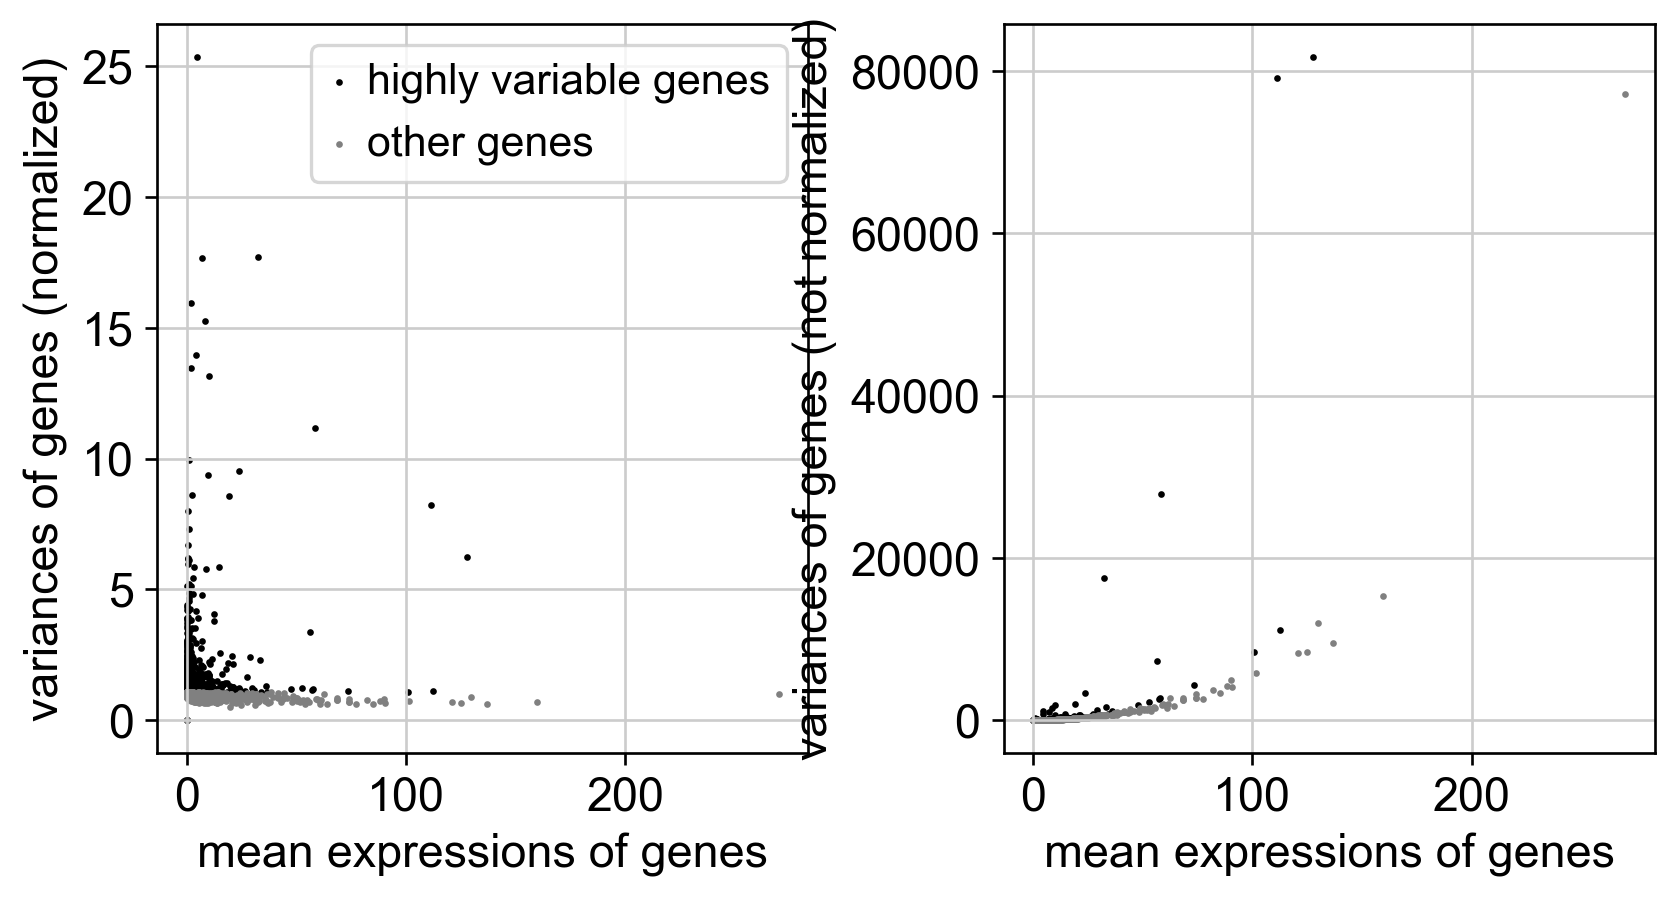

In [12]:
sc.pl.highly_variable_genes(adata)


In [13]:
adata = adata[:, adata.var["highly_variable"]].copy()


computing PCA
    with n_comps=50
    finished (0:00:02)


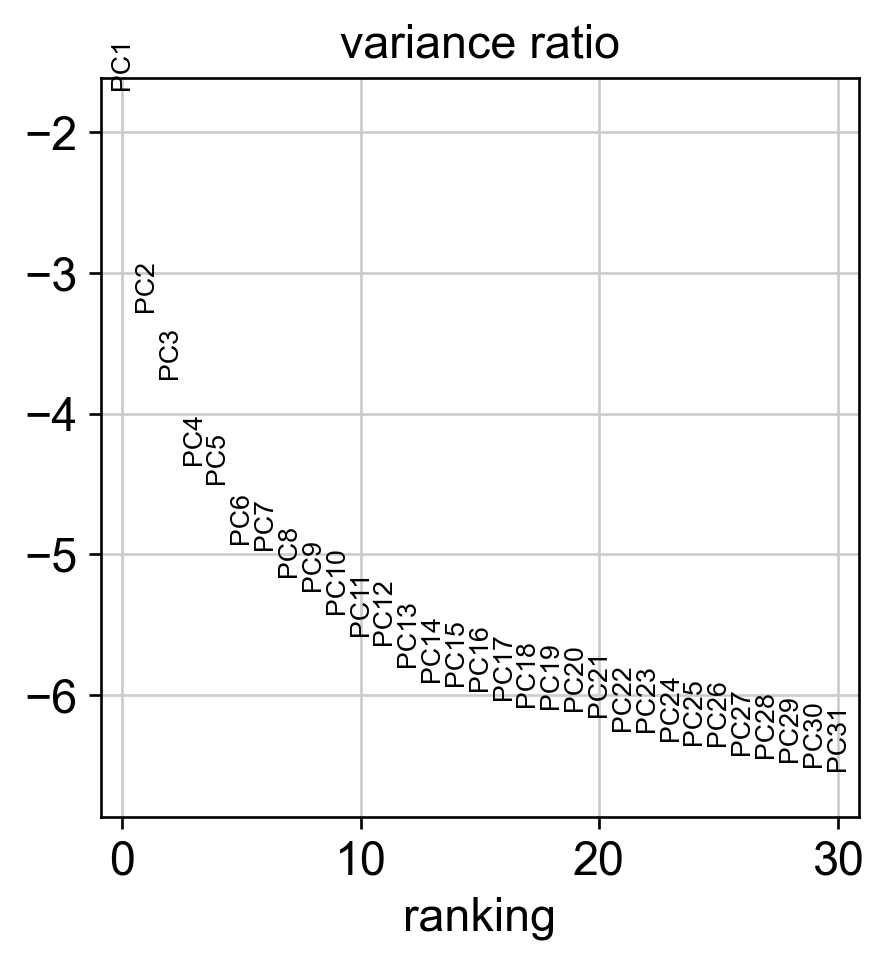

In [14]:
#Scale & PCA

sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver="arpack")
sc.pl.pca_variance_ratio(adata, log=True)


In [15]:
#kNN graph (expression space baseline)

sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)


computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:00)


computing UMAP
    finished (0:00:15)


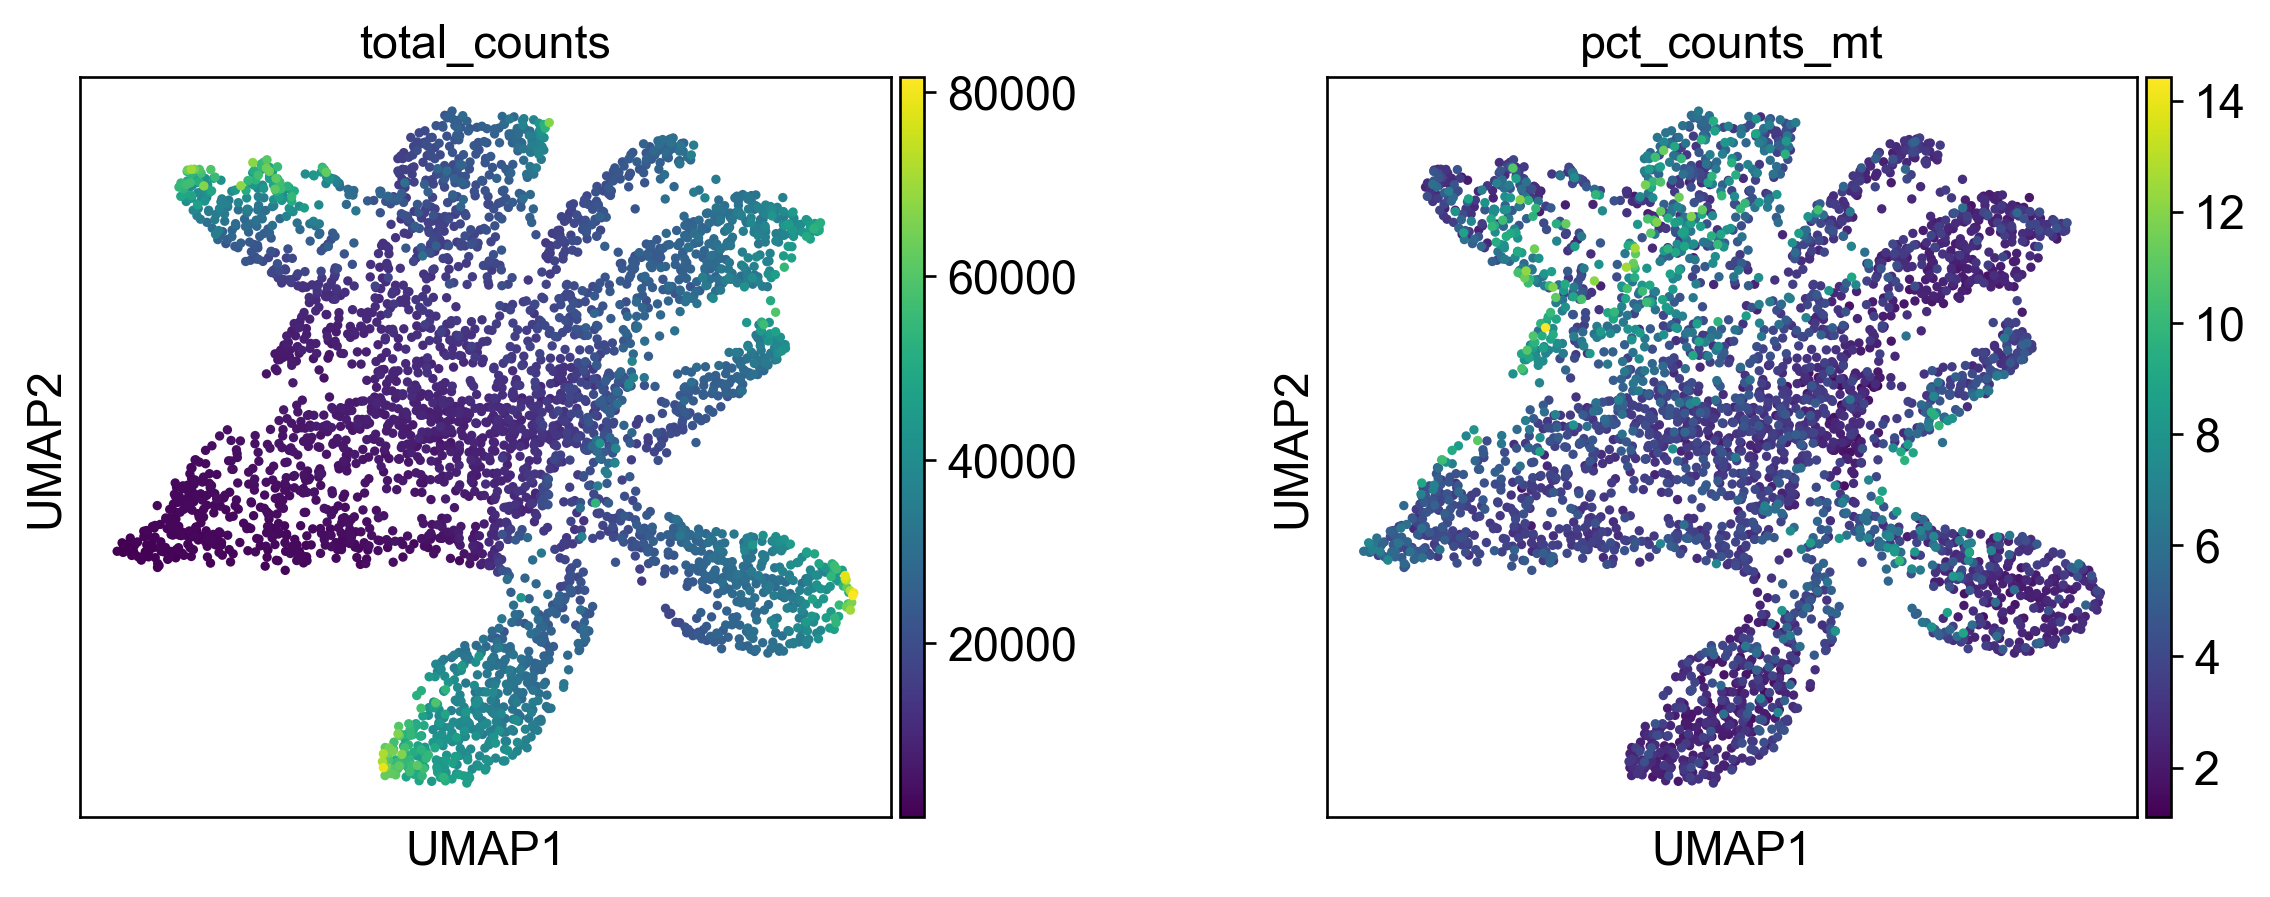

In [16]:
#UMAP for checking

sc.tl.umap(adata)
sc.pl.umap(adata, color=["total_counts", "pct_counts_mt"], wspace=0.4)


In [19]:
adata.raw = adata.copy()


In [20]:
OUT = Path("../data/processed")
OUT.mkdir(exist_ok=True)

adata.write_h5ad(OUT / "visium_breast_cancer_blockA_section1_prepped.h5ad")
print("saved:", OUT / "visium_breast_cancer_blockA_section1_prepped.h5ad")




saved: ..\data\processed\visium_breast_cancer_blockA_section1_prepped.h5ad


In [21]:
print("layers:", list(adata.layers.keys()))
print("raw:", adata.raw is not None)


layers: ['counts']
raw: True
